##  데이터 출처 : UCI Machine Learning Repository

- 해외 은행이 진행한 마케팅 데이터
- 아웃바운드 텔레마켓팅으로 마케팅 캠페인을 진행

# bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
7 - loan: has personal loan? (categorical: "no","yes","unknown")<br>
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") <br>
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
  14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")<br>
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)  <br>   
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)   <br>  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
  20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

  Output variable (desired target):<br>
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# matplotlib 한글 폰트 출력코드

import matplotlib
from matplotlib import font_manager, rc
import platform


# 윈도우
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [7]:
df=pd.read_csv('./bank-additional-full.csv')
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


- 콜론으로 구분된 데이터

In [8]:
df=pd.read_csv('./bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 데이터 탐색

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df.shape

(41188, 21)

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [14]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

## 데이터 시각화

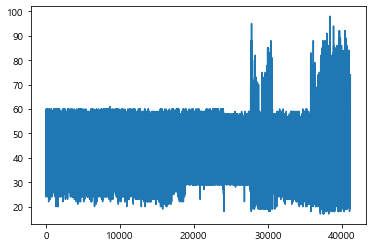

In [15]:
df['age'].plot()
plt.show()

 - age 칼럼 선그래프 그리기(오름차순)
     - 노출수칼럼을 수치 순서대로 오름차순 정렬
     - 정렬된 데이터(시리즈)의 형태대로 인덱스 재생성

In [16]:
age=df['age'].sort_values()
age = (age.reset_index()).drop('index',axis=1)
age

,age
0,17
1,17
2,17
3,17
4,17
...,...
41183,92
41184,94
41185,95
41186,98


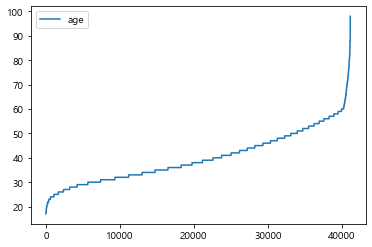

In [17]:
age.plot()
plt.show()
# '나이'를 20대, 30대, 40대... 나누어 데이터를 확인함

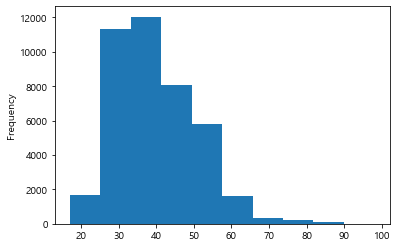

In [18]:
# 히스토그램
df['age'].plot.hist()
plt.show()

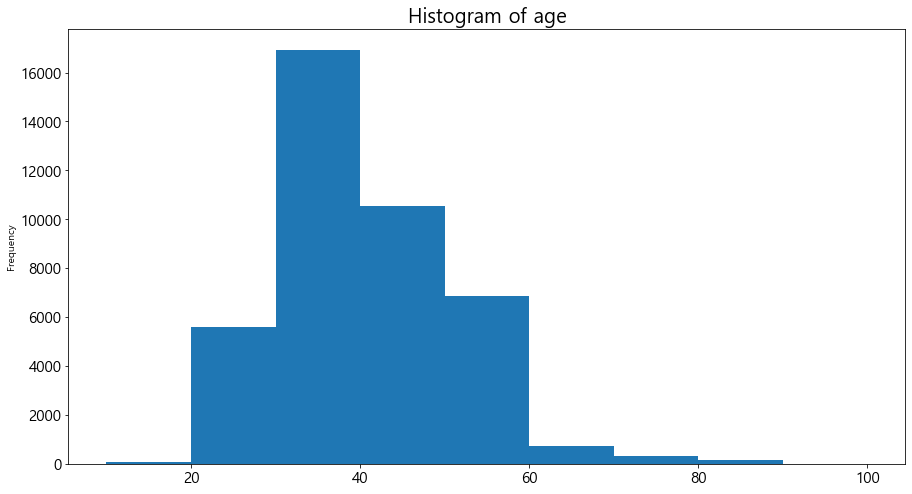

In [26]:
df['age'].plot.hist(bins=range(10,101,10), figsize=[15,8])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of age',fontsize=20)
plt.show()

In [30]:
# duration(전화통화시간) 선 그래프 시각화
# 히스토그램 계급구간을 설정하기 위해 최소값, 최대값 파악
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

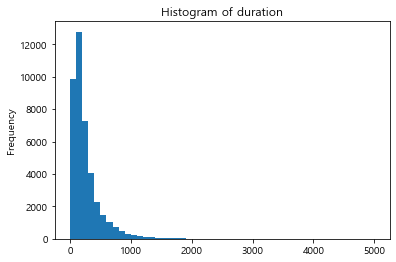

In [32]:
df['duration'].plot.hist(bins=range(0, 5001,100))
plt.title('Histogram of duration')
plt.show()

In [33]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

- 막대그래프를 통한 시각화
    - value_counts
    - 막대그래프 시각화

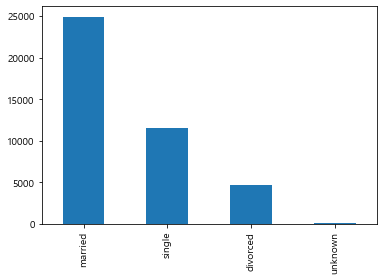

In [34]:
marital=df['marital'].value_counts()
marital.plot.bar()
plt.show()

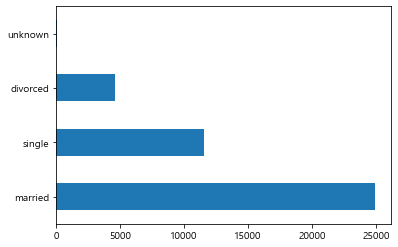

In [35]:
# 가로막대그래프 시각화
marital.plot.barh()
plt.show()

In [36]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

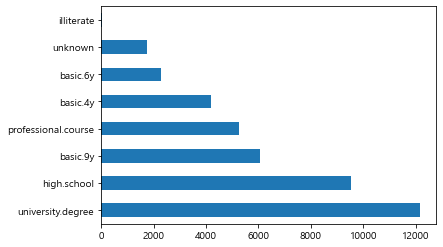

In [38]:
education=df['education'].value_counts()
education.plot.barh()
plt.show()

## 데이터 분석

### 가설 : 대출이 있는 사람이라면 은행 상품에 잘 가입하지 않을 것이다.

- 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
- 나뉜 데이터를 대출여부에 따라 나눈다.
- 가입한 그룹 중 대출이 있는 사람의 비중과, 가입하지 않은 그룹 중 대출이 있는 사람의 비중을 비교한다.

In [39]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [40]:
grouped = df.groupby('y')

In [41]:
yes_group=grouped.get_group('yes')
no_group = grouped.get_group('no')

In [43]:
# 2. 나뉜 데이터(yes_group, no_group)를 대출여부(loan)에 따라 나눈다.
yes=yes_group['loan'].value_counts()
yes

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [44]:
no=no_group['loan'].value_counts()
no

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

In [50]:
# 3.가입한 그룹 중 대출이 있는 사람의 비중과, 가입하지 않은 그룹 중 
# 대출이 있는 사람의 비중을 비교한다.
# 비중 : 각각의 value를 시리즈의 총합으로 나눔

yes=yes/yes.sum()
yes.name = 'y_yes'
yes

no         0.829741
yes        0.147198
unknown    0.023060
Name: y_yes, dtype: float64

In [51]:
no=no/no.sum()
no.name = 'y_no'
no

no         0.823574
yes        0.152266
unknown    0.024160
Name: y_no, dtype: float64

In [52]:
pd.concat([yes, no], axis=1)

## --> 가입한 그룹의 대출 비중이 가입하지 않은 그룹보다 0.005 더 작다.

,y_yes,y_no
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


### 주제 : 같은 상품을 새로운 고객에게 마케팅 하려고한다. <br>연령과 상품가입여부, 직업을 함께 고려할때 마케팅 전략을 변화시켜야 할 그룹은?

In [56]:
# pivot_table('데이터프레임 변수', values=집계 대상 칼럼, index=행 인덱스 칼럼,
# columns=열 인덱스가 될 칼럼, aggfunc=집계함수)
pd.pivot_table(df, values='age', index=['y','marital'], columns=['job','contact'], aggfunc='mean')

job              admin.            blue-collar            entrepreneur  \
contact        cellular  telephone    cellular  telephone     cellular   
y   marital                                                              
no  divorced  43.143639  43.019185   42.906907  42.900585    43.301887   
    married   40.349554  39.800357   41.182477  40.494249    42.213628   
    single    33.515821  34.646707   32.872838  34.183554    36.181034   
    unknown   35.000000  31.000000   43.800000  42.000000    40.000000   
yes divorced  45.028302  44.269231   41.500000  43.400000    45.333333   
    married   41.362832  41.540230   41.682432  40.608000    44.177419   
    single    32.117284  34.150000   31.934426  34.897436    35.117647   
    unknown   42.500000        NaN   37.000000        NaN    31.000000   

job                      housemaid            management             ...  \
contact       telephone   cellular  telephone   cellular  telephone  ...   
y   marital                                                          ...   
no  divorced  45.372881  48.292683  49.476190  44.786164  47.721805  ...   
    married   42.802273  45.900966  43.342561  43.740678  43.452416  ...   
    single    34.227273  36.827586  39.711111  33.747405  34.697987  ...   
    unknown   31.000000  40.000000        NaN        NaN  51.000000  ...   
yes divorced  44.000000  59.857143  37.000000  46.297297  54.000000  ...   
    married   40.500000  55.375000  50.777778  45.401099  42.090909  ...   
    single    38.000000  40.769231  41.333333  32.763636  36.875000  ...   
    unknown         NaN        NaN        NaN        NaN        NaN  ...   

job            services               student            technician  \
contact        cellular  telephone   cellular  telephone   cellular   
y   marital                                                           
no  divorced  42.028269  41.944444  36.000000  27.000000  42.069034   
    married   40.483733  39.395833  32.150000  27.923077  40.283568   
    single    32.360927  31.863081  25.396509  27.742138  33.529248   
    unknown   34.500000  42.750000  30.000000        NaN  30.285714   
yes divorced  43.083333  44.555556  35.666667        NaN  40.701754   
    married   38.634921  37.575000  30.333333  34.000000  41.299065   
    single    30.846154  31.950000  24.174468  26.965517  31.995902   
    unknown         NaN        NaN        NaN        NaN  30.000000   

job                     unemployed               unknown             
contact       telephone   cellular  telephone   cellular  telephone  
y   marital                                                          
no  divorced  42.435644  42.253731  41.978723  46.000000  40.600000  
    married   41.365495  41.452769  41.871369  48.349057  46.758929  
    single    35.008741  33.252101  33.940476  39.535714  37.161290  
    unknown   40.333333  46.500000  50.000000  48.333333  32.000000  
yes divorced  41.000000  51.000000  40.666667  76.333333        NaN  
    married   41.904762  42.746479  38.133333  58.181818  60.000000  
    single    32.657143  32.355556  27.666667  31.000000  28.000000  
    unknown         NaN        NaN        NaN  45.000000  32.000000  

[8 rows x 24 columns]

In [57]:
# 결측치 대체 fill_value
pd.pivot_table(df, values='age', index=['y','marital'], columns=['job','contact'], aggfunc='mean', fill_value=0)

job              admin.            blue-collar            entrepreneur  \
contact        cellular  telephone    cellular  telephone     cellular   
y   marital                                                              
no  divorced  43.143639  43.019185   42.906907  42.900585    43.301887   
    married   40.349554  39.800357   41.182477  40.494249    42.213628   
    single    33.515821  34.646707   32.872838  34.183554    36.181034   
    unknown   35.000000  31.000000   43.800000  42.000000    40.000000   
yes divorced  45.028302  44.269231   41.500000  43.400000    45.333333   
    married   41.362832  41.540230   41.682432  40.608000    44.177419   
    single    32.117284  34.150000   31.934426  34.897436    35.117647   
    unknown   42.500000   0.000000   37.000000   0.000000    31.000000   

job                      housemaid            management             ...  \
contact       telephone   cellular  telephone   cellular  telephone  ...   
y   marital                                                          ...   
no  divorced  45.372881  48.292683  49.476190  44.786164  47.721805  ...   
    married   42.802273  45.900966  43.342561  43.740678  43.452416  ...   
    single    34.227273  36.827586  39.711111  33.747405  34.697987  ...   
    unknown   31.000000  40.000000   0.000000   0.000000  51.000000  ...   
yes divorced  44.000000  59.857143  37.000000  46.297297  54.000000  ...   
    married   40.500000  55.375000  50.777778  45.401099  42.090909  ...   
    single    38.000000  40.769231  41.333333  32.763636  36.875000  ...   
    unknown    0.000000   0.000000   0.000000   0.000000   0.000000  ...   

job            services               student            technician  \
contact        cellular  telephone   cellular  telephone   cellular   
y   marital                                                           
no  divorced  42.028269  41.944444  36.000000  27.000000  42.069034   
    married   40.483733  39.395833  32.150000  27.923077  40.283568   
    single    32.360927  31.863081  25.396509  27.742138  33.529248   
    unknown   34.500000  42.750000  30.000000   0.000000  30.285714   
yes divorced  43.083333  44.555556  35.666667   0.000000  40.701754   
    married   38.634921  37.575000  30.333333  34.000000  41.299065   
    single    30.846154  31.950000  24.174468  26.965517  31.995902   
    unknown    0.000000   0.000000   0.000000   0.000000  30.000000   

job                     unemployed               unknown             
contact       telephone   cellular  telephone   cellular  telephone  
y   marital                                                          
no  divorced  42.435644  42.253731  41.978723  46.000000  40.600000  
    married   41.365495  41.452769  41.871369  48.349057  46.758929  
    single    35.008741  33.252101  33.940476  39.535714  37.161290  
    unknown   40.333333  46.500000  50.000000  48.333333  32.000000  
yes divorced  41.000000  51.000000  40.666667  76.333333   0.000000  
    married   41.904762  42.746479  38.133333  58.181818  60.000000  
    single    32.657143  32.355556  27.666667  31.000000  28.000000  
    unknown    0.000000   0.000000   0.000000  45.000000  32.000000  

[8 rows x 24 columns]

In [58]:
pivot = pd.pivot_table(df, values='age', index='y', columns='job', aggfunc='mean')
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [59]:
# yes행과 no 행의 차 연산
pivot.loc['diff']=pivot.loc['yes']-pivot.loc['no']
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054
diff,-0.250911,-0.381430,0.232030,7.945493,0.473829,8.327329,-2.170175,-2.012836,-1.596667,-0.853458,-0.782328,1.678627


In [64]:
# diff 기준으로 내림차순
result = pivot.sort_values('diff',axis=1,ascending=False)
result
# retired, housemaid 그룹에 대해서는 연령을 높여서 마케팅을 해야함.

job,retired,housemaid,unknown,management,entrepreneur,admin.,blue-collar,unemployed,technician,student,services,self-employed
y,,,,,,,,,,,,
no,59.926128,44.705451,45.375427,42.309707,41.703453,38.219846,39.582057,39.844828,38.600033,26.396667,38.090236,40.176887
yes,68.253456,52.650943,47.054054,42.783537,41.935484,37.968935,39.200627,39.062500,37.746575,24.800000,36.077399,38.006711
diff,8.327329,7.945493,1.678627,0.473829,0.232030,-0.250911,-0.381430,-0.782328,-0.853458,-1.596667,-2.012836,-2.170175


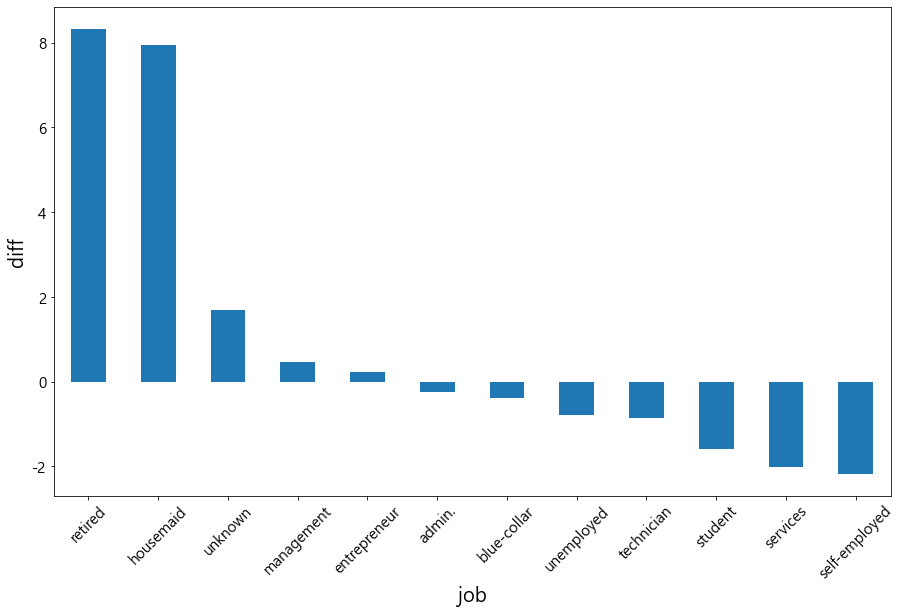

In [71]:
# result 시각화
result.loc['diff'].plot.bar(figsize=[15,9])
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('job', fontsize=20)
plt.ylabel('diff', fontsize=20)
plt.show()